# Dataset Description

Please note that it was copied [from the competition website](https://www.kaggle.com/competitions/blood-vessel-segmentation/data) for convenience

This competition dataset comprises high-resolution 3D images of several kidneys together with 3D segmentation masks of their vasculature. Your task is to create segmentation masks for the kidney datasets in the test set.

The kidney images were obtained through Hierarchical Phase-Contrast Tomography (HiP-CT) imaging. HiP-CT is an imaging technique that obtains high-resolution (from 1.4 micrometers - 50 micrometers resolution) 3D data from ex vivo organs. See this [Nature Methods article](https://www.nature.com/articles/s41592-021-01317-x) for more information.

## File and Field Information
**train/{dataset}/images** - Contains TIFF scans from several kidney datasets. Each image represents a 2D slice of a 3D volume. The slices run along the z-axis, with files enumerated from top to bottom. (The slices should be stacked vertically or depth-wise, in other words.)

**train/{dataset}/labels** - Contains blood vessel segmentation masks in TIFF format for the images.  
The **{dataset}** folders comprise the following:

- `kidney_1_dense` - The whole of a right kidney at 50um resolution. The entire 3D arterial vascular tree has been densely segmented, down to two generations from the glomeruli (i.e. the capillary bed). Uses beamline BM05.
- `kidney_1_voi` - A high-resolution subset of kidney_1, at 5.2um resolution.
- `kidney_2` - The whole of a kidney from another donor, at 50um resolution. Sparsely segmented (about 65%).
- `kidney_3_dense` - A portion (500 slices) of a kidney at 50.16um resolution using BM05. Densely segmented. Note that we provide all of the images for kidney_3 in the kidney_3_sparse/images folder. This dataset accordingly has only a labels folder.
- `kidney_3_sparse` - The remainder of the segmentation masks for kidney_3. Sparsely segmented (about 85%).
test/{dataset}/images - Contains the TIFF scans for the test set. These scans may or may not use a different beamline or resolution from the scans used in the training set. The names of the datasets are kidney_5 and kidney_6.

**train_rles.csv** - The run length encoded segmentation masks for images in the training set.

- `id` - A unique identifier for each slice, in the form {dataset}_{slice}.
- `rle` - The run length encoded mask for this slice.

## Files structure exploration
Kaggle makes the dataset available on GCS (Google Cloud Storage).  
We'll use it as a source.  
First, let's explore the files and visualize some of them.

In [149]:
GCS_PATH = "gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16"

In [78]:
!gsutil ls $GCS_PATH

gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/sample_submission.csv
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train_rles.csv
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/test/
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/


Let's explore directory sturcture

In [82]:
!gsutil ls $GCS_PATH/train/

gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_voi/
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_2/
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_3_dense/
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_3_sparse/


In [85]:
!gsutil ls $GCS_PATH/train/kidney_1_dense

gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/images/
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/labels/


the first 5 image files for `kidney_1_dense`

In [86]:
!gsutil ls $GCS_PATH/train/kidney_1_dense/images | head -n 5

gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/images/0000.tif
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/images/0001.tif
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/images/0002.tif
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/images/0003.tif
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/images/0004.tif
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe


the first 5 label files for `kidney_1_dense`

In [87]:
!gsutil ls $GCS_PATH/train/kidney_1_dense/labels | head -n 5

gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/labels/0000.tif
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/labels/0001.tif
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/labels/0002.tif
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/labels/0003.tif
gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/train/kidney_1_dense/labels/0004.tif
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe


Now let's count the images and their labels for each directory using the following shell script

In [68]:
!cat ./count_images.sh

#!/bin/bash

GCS_PATH="gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16"


function process_directory {
  local dir_name="$1"
  local image_count=$(gsutil ls "${GCS_PATH}/${dir_name}/images" | wc -l)
  local label_count=$(gsutil ls "${GCS_PATH}/${dir_name}/labels" | wc -l)
  
  echo "${dir_name} images number ${image_count}, labels number ${label_count}"
}

if [ $# -ne 1 ]; then
  echo "Usage: $0 <directory>"
  exit 1
fi

directory="$1"

# Iterate through directories in gs://kds-435748dc60032c71c8c8d636b553f125b1f40cdc3e86846628773d16/{train,test}
for dir_path in $(gsutil ls "${GCS_PATH}/${directory}/"); do
  # Extract directory name from the path
  dir_name=$(basename "${dir_path}")
  echo "${directory}/${dir_name}"
  # Process each directory using the function
  process_directory "${directory}/${dir_name}"
done


**Train images**

In [67]:
! ./count_images.sh train

train/kidney_1_dense
train/kidney_1_dense images number     2279, labels number     2279
train/kidney_1_voi
train/kidney_1_voi images number     1397, labels number     1397
train/kidney_2
train/kidney_2 images number     2217, labels number     2217
train/kidney_3_dense
CommandException: One or more URLs matched no objects.
train/kidney_3_dense images number        0, labels number      501
train/kidney_3_sparse
train/kidney_3_sparse images number     1035, labels number     1035


As expected we see that `kidney_3_dense` folder only contains some labels, the corresponding images are in `kidney_3_sparse` images folder

**Test images**

In [72]:
! ./count_images.sh test

test/kidney_5
CommandException: One or more URLs matched no objects.
test/kidney_5 images number        3, labels number        0
test/kidney_6
CommandException: One or more URLs matched no objects.
test/kidney_6 images number        3, labels number        0


There are only 6 images in the test set and no labels  
That's expected since the real test images are provided during execution of the competition submission

# Explore csv with train RLEs

Competition submission is expected to be a **Run-Length Encoding (RLE)**.  
RLE is a simple form of data compression where consecutive identical elements are replaced with a single value followed by the number of times that value is repeated.  
The output is a string in the format 'start1 length1 start2 length2 ...'.  
For the training data RL-encoded masks are provided in csv format, let's explore it as well

In [14]:
import pandas as pd

In [88]:
train_rles_df = pd.read_csv(f'{GCS_PATH}/train_rles.csv')

In [89]:
train_rles_df.head()

,id,rle
0,kidney_1_dense_0000,1 0
1,kidney_1_dense_0001,1 0
2,kidney_1_dense_0002,1 0
3,kidney_1_dense_0003,1 0
4,kidney_1_dense_0004,1 0


First images don't seem to have any vessels

In [21]:
train_rles_df[train_rles_df.id.str.startswith('kidney_2_1')]

,id,rle
4676,kidney_2_1000,185130 1 186640 1 188150 1 189660 2 191170 2 1...
4677,kidney_2_1001,194191 1 195701 1 197211 1 198721 2 200232 1 2...
4678,kidney_2_1002,203253 1 204763 2 206273 2 207784 2 209294 3 2...
4679,kidney_2_1003,207784 1 209294 2 210804 3 212315 2 213825 3 2...
4680,kidney_2_1004,212315 1 213825 2 215335 3 216846 1 274144 1 2...
...,...,...
5671,kidney_2_1995,535711 2 537222 1 541809 2 543185 1 543320 2 5...
5672,kidney_2_1996,534200 1 535711 2 541809 2 543184 2 543320 2 5...
5673,kidney_2_1997,534200 2 535711 2 541809 3 543184 2 543321 2 5...
5674,kidney_2_1998,534200 2 535711 2 541810 2 543184 2 543321 1 5...


# Download and visualize some random images from each sample

Copy some images and labels approx from the middle slices of kidney_1_dense

In [128]:
!mkdir -p tmp/images
!mkdir -p tmp/labels

In [261]:
import os 
import cv2
import matplotlib.pyplot as plt
import random

In [165]:
def get_random_image_and_label_path():
    dir_path = 'tmp/images'
    label_dir_path = 'tmp/labels/'
    img_name = random.choice(os.listdir(dir_path))
    return f'{dir_path}/{img_name}', f'{label_dir_path}{img_name}'

In [239]:
def get_sample_image_size():
    img_path, label_path = get_random_image_and_label_path()
    print(f'shape of the images is {cv2.imread(img_path).shape}')
    print(f'shape of the labels is {cv2.imread(label_path).shape}')

In [272]:
def plot_random_images(sample_name):
    plt.figure(figsize=(16,16))
    for n in range(2):
        img_path, label_path = get_random_image_and_label_path()
        image = cv2.imread(img_path)
        mask = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
        masked_image = cv2.bitwise_and(image, image, mask=mask)
        img_name = img_path.split('/')[-1]
        ax = plt.subplot(2, 2, 2*(n+1)-1)
        ax.imshow(image)
        ax.set_title(img_name)
        ax.axis(False)
        ax = plt.subplot(2, 2, 2*(n+1))
        ax.imshow(masked_image)
        ax.set_title(f'masked {img_name}')
        ax.axis(False)


# kidney_1_dense

In [274]:
sample_name = 'kidney_1_dense'

In [275]:
%%capture
!gsutil -m cp -n '{GCS_PATH}/train/{sample_name}/images/111?.tif' tmp/images
!gsutil -m cp -n '{GCS_PATH}/train/{sample_name}/labels/111?.tif' tmp/labels

shape of the images is (1303, 912, 3)
shape of the labels is (1303, 912, 3)


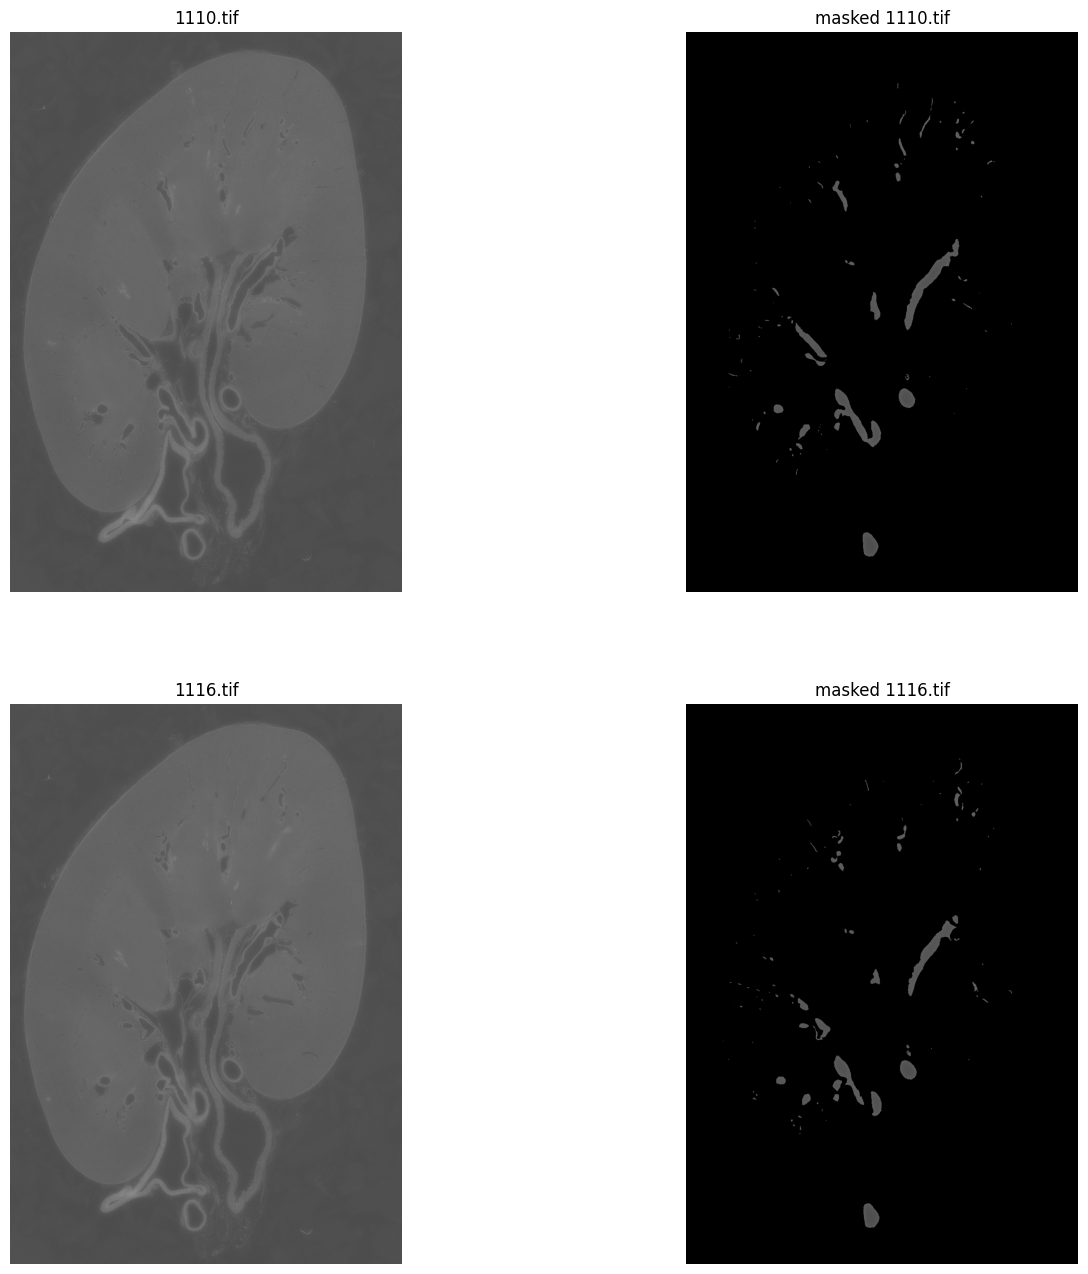

In [276]:
get_sample_image_size()
plot_random_images(sample_name)

In [278]:
!find tmp -type f -delete

## kidney_1_voi

In [279]:
sample_name = 'kidney_1_voi'

In [280]:
%%capture
!gsutil -m cp -n '{GCS_PATH}/train/{sample_name}/images/111?.tif' tmp/images
!gsutil -m cp -n '{GCS_PATH}/train/{sample_name}/labels/111?.tif' tmp/labels

shape of the images is (1928, 1928, 3)
shape of the labels is (1928, 1928, 3)


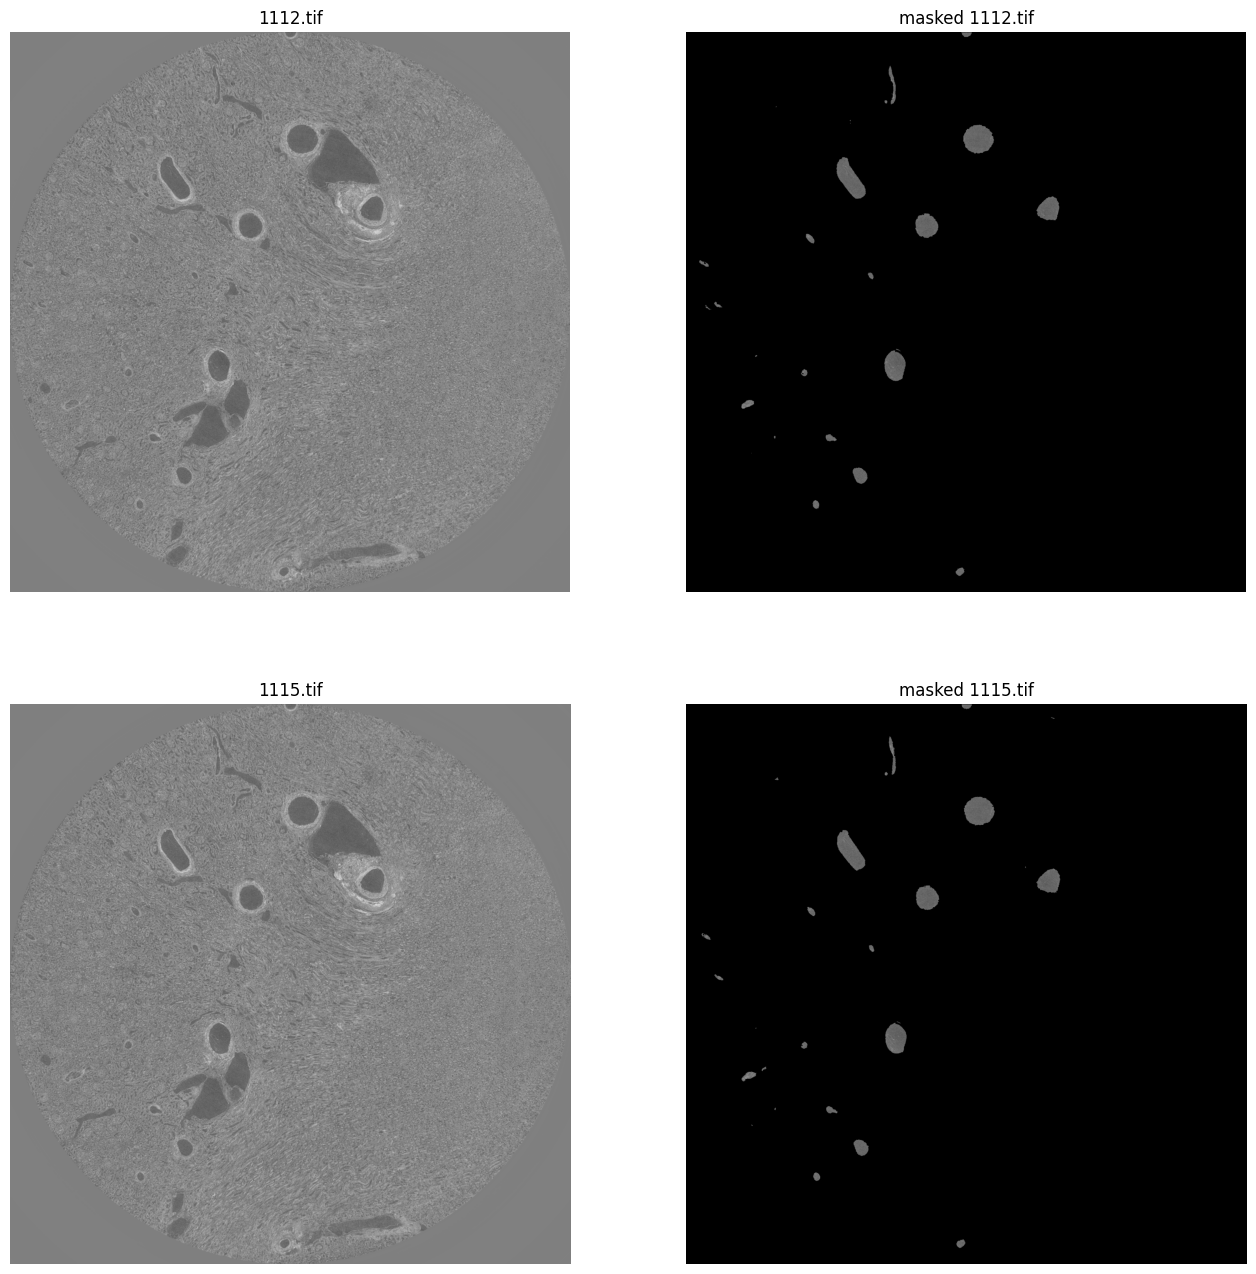

In [281]:
get_sample_image_size()
plot_random_images(sample_name)

In [282]:
!find tmp -type f -delete

## kidney_2

In [283]:
sample_name = 'kidney_2'

In [284]:
%%capture
!gsutil -m cp -n '{GCS_PATH}/train/{sample_name}/images/111?.tif' tmp/images
!gsutil -m cp -n '{GCS_PATH}/train/{sample_name}/labels/111?.tif' tmp/labels

shape of the images is (1041, 1511, 3)
shape of the labels is (1041, 1511, 3)


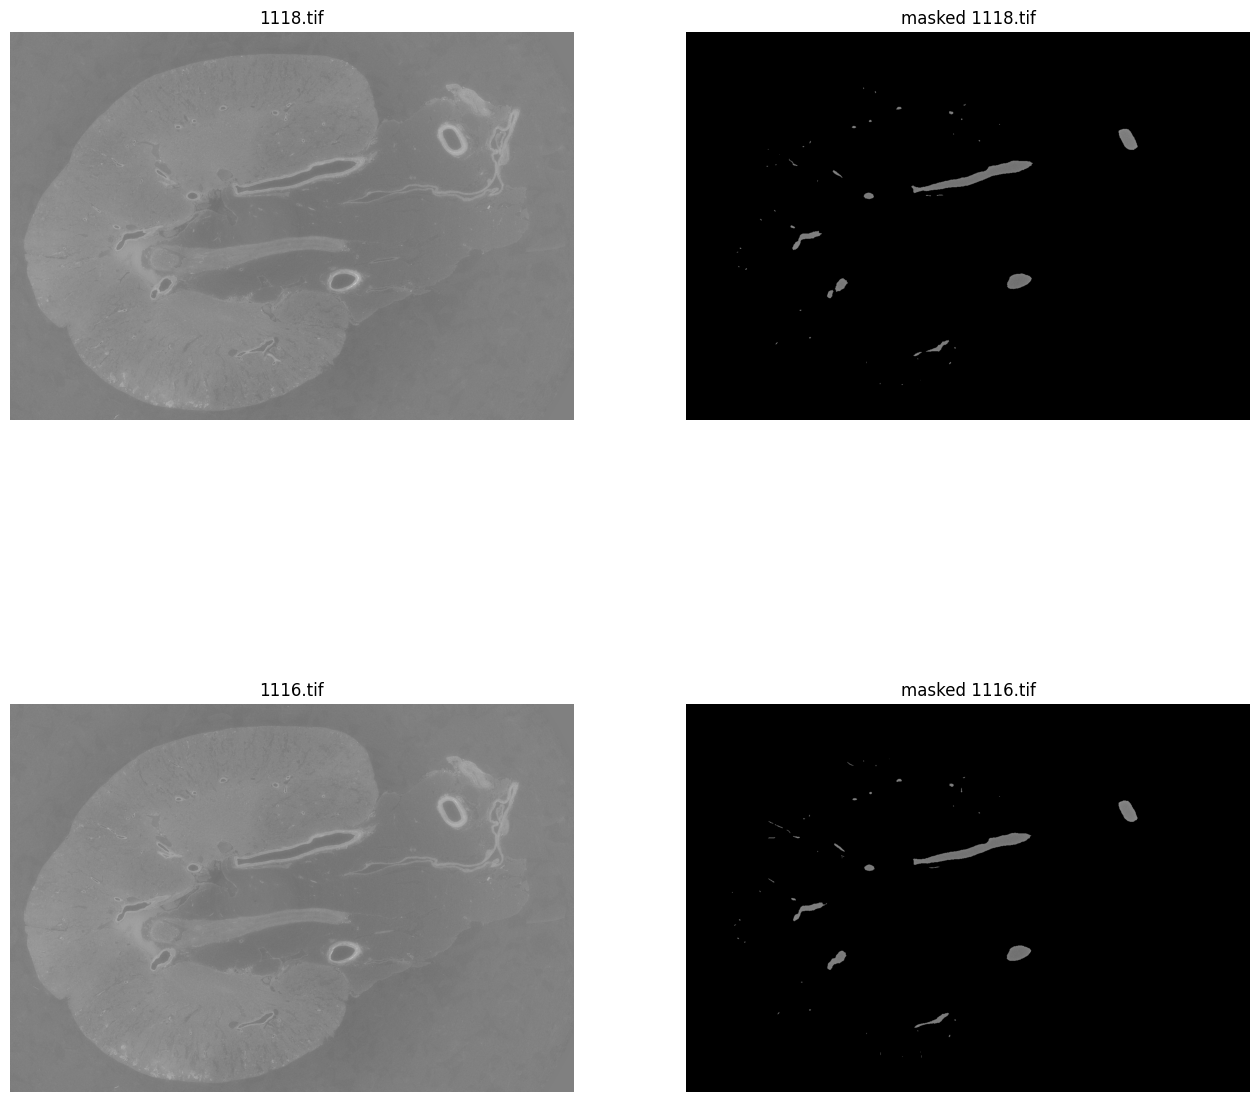

In [286]:
get_sample_image_size()
plot_random_images(sample_name)

In [287]:
!find tmp -type f -delete

## kidney_3_sparse

In [288]:
sample_name = 'kidney_3_sparse'

In [291]:
%%capture
!gsutil -m cp -n '{GCS_PATH}/train/{sample_name}/images/070?.tif' tmp/images
!gsutil -m cp -n '{GCS_PATH}/train/{sample_name}/labels/070?.tif' tmp/labels

shape of the images is (1706, 1510, 3)
shape of the labels is (1706, 1510, 3)


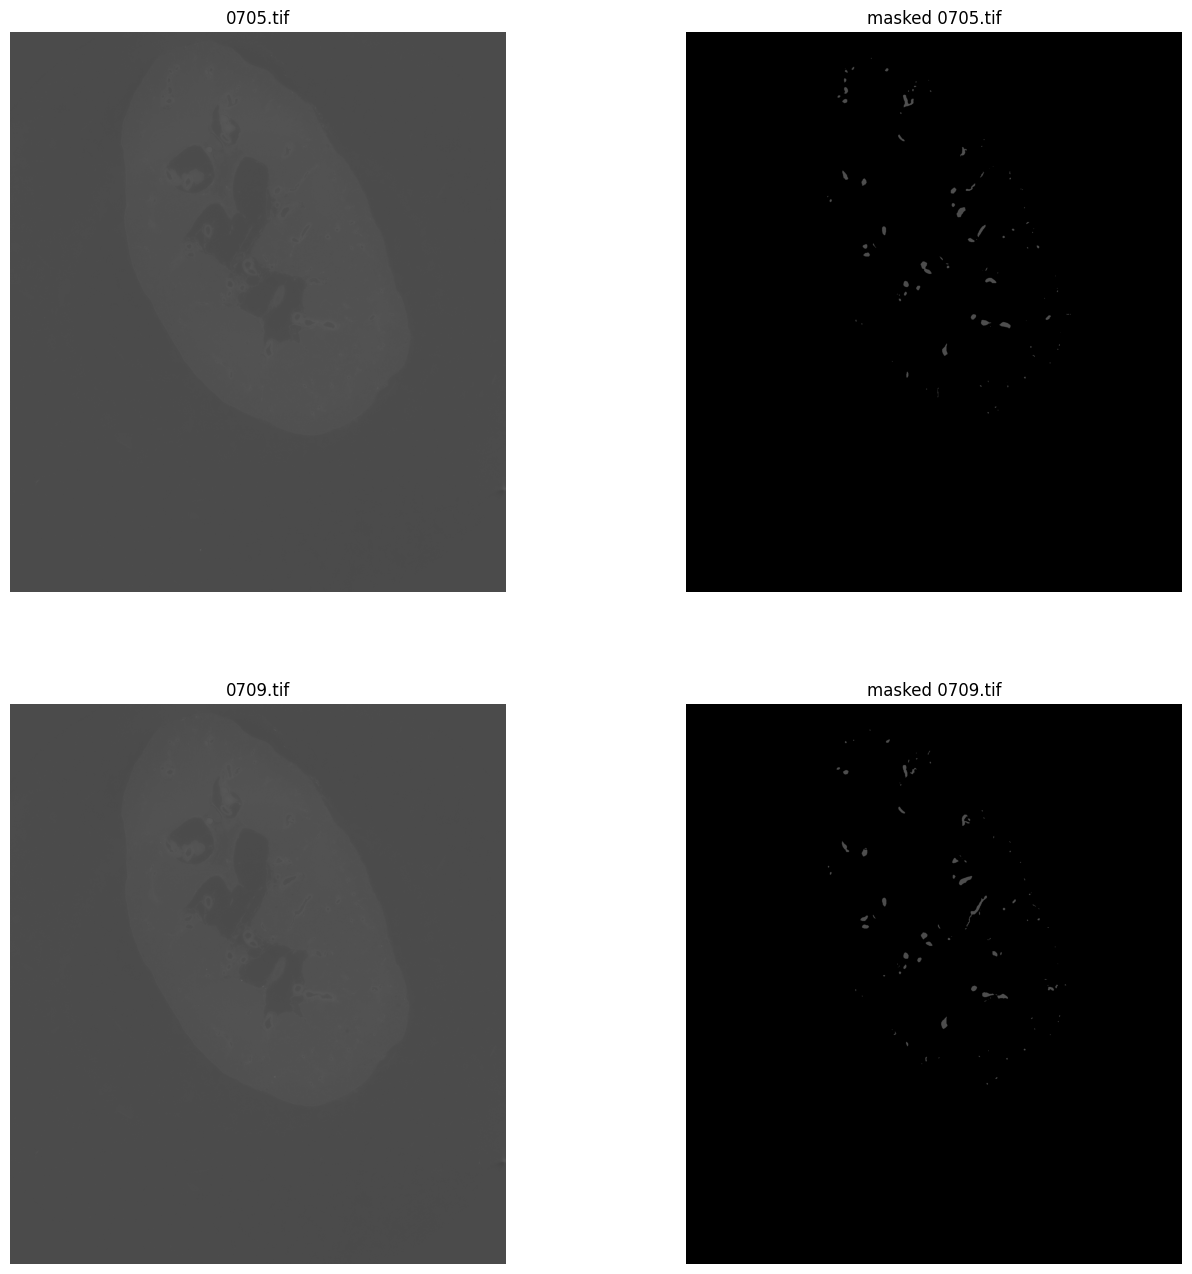

In [292]:
get_sample_image_size()
plot_random_images(sample_name)

In [293]:
!find tmp -type f -delete

## kidney_3_dense

In [294]:
sample_name = 'kidney_3_dense'

In [295]:
%%capture
!gsutil -m cp -n '{GCS_PATH}/train/kidney_3_sparse/images/070?.tif' tmp/images
!gsutil -m cp -n '{GCS_PATH}/train/{sample_name}/labels/070?.tif' tmp/labels

shape of the images is (1706, 1510, 3)
shape of the labels is (1706, 1510, 3)


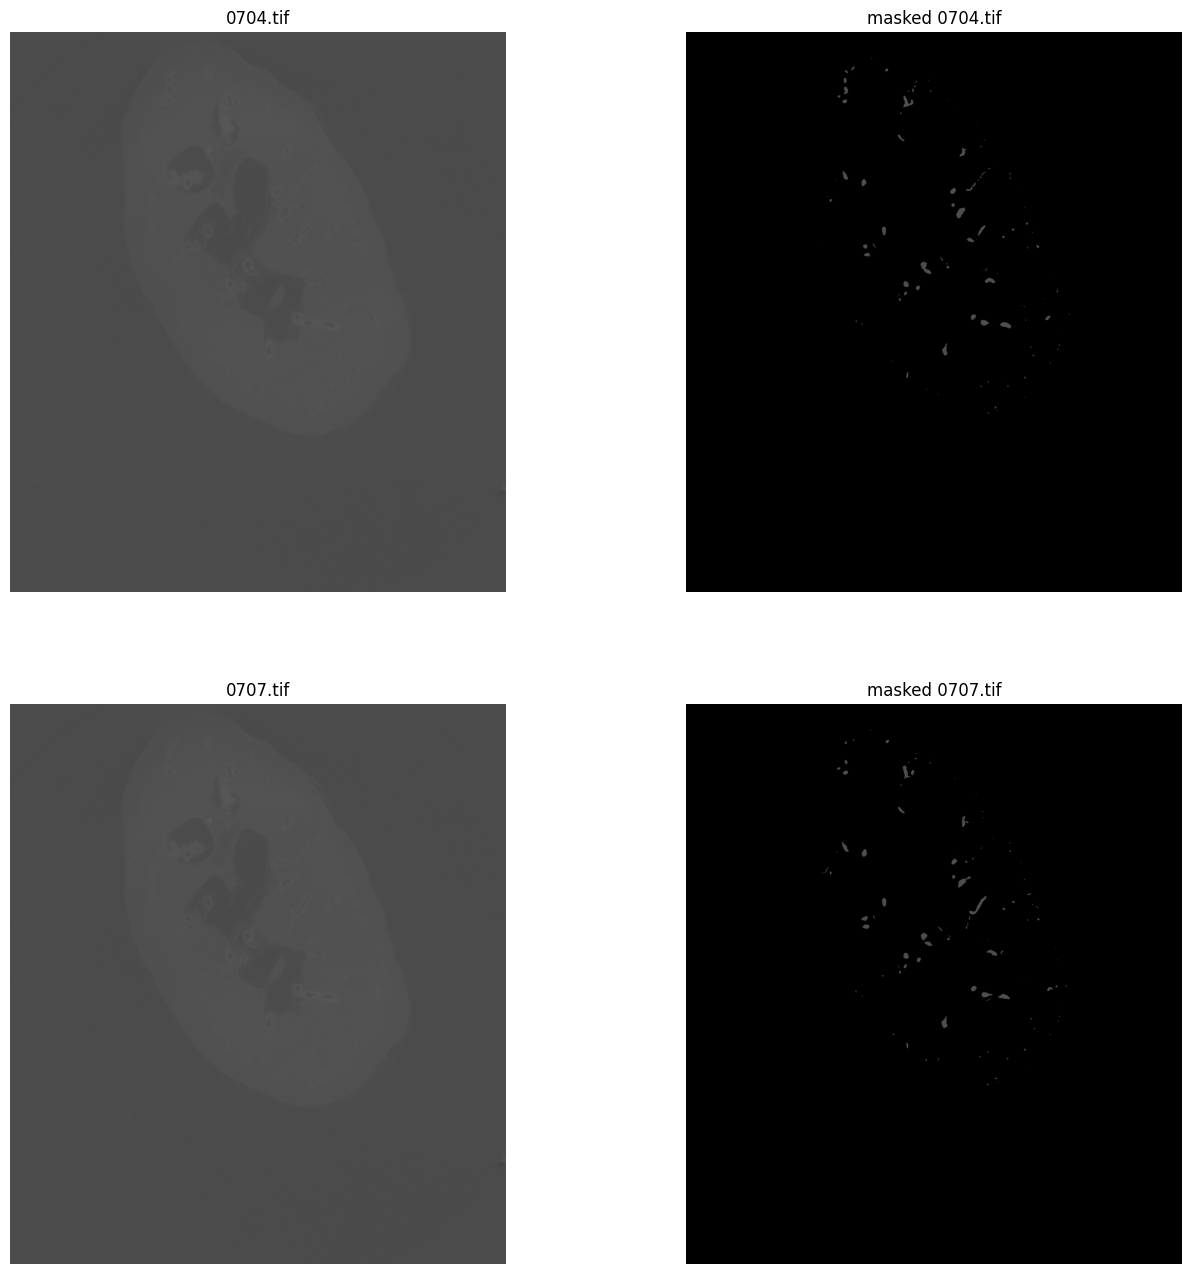

In [296]:
get_sample_image_size()
plot_random_images(sample_name)

In [293]:
!find tmp -type f -delete

## Clean-up

In [297]:
!rm -r tmp